In [393]:
# import pandas and read the csv, set encoding to avoid reading errors, try to parse the date to timestamp
import pandas as pd
df = pd.read_csv("./data/data.csv", encoding="unicode_escape", parse_dates=["InvoiceDate"])

In [171]:
# EDA AND CLEANING
# EDA AND CLEANING
# EDA AND CLEANING
# EDA AND CLEANING

In [122]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [123]:
# checking basic statistics, extremes, ranges
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [124]:
# what types were (not) inferred by python?
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [125]:
# what amount of N/A's are we dealing with?
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [126]:
# what is the typical length of the invoice number?
df["InvoiceNo"].str.len().mean()

np.float64(6.017144944999991)

In [127]:
# invoice no should be a string, since this exact pattern matches all of them
# and contains letters and numbers
df.loc[~df["InvoiceNo"].str.fullmatch(r"[a-zA-Z]?[0-9]{6}", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [128]:
df["StockCode"]

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 541909, dtype: object

In [129]:
# what average length is the stock code string?
df["StockCode"].str.len().mean()

np.float64(5.086844839262681)

In [130]:
# stock code should be a string, since 
# there are stock names containing letters and digits
df.loc[df["StockCode"].str.len() != 5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [131]:
df.loc[~df["StockCode"].str.contains(r"[0-9]+")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany


In [132]:
# convert description to string
df["Description"] = df["Description"].astype("string")

In [133]:
# fill missing descriptions with a simple string & check if it succeeded
df["Description"] = df["Description"].fillna("No Description")
df.loc[df["Description"].isna()].shape[0]

0

In [134]:
# how many rows got a negative quantity? 
df.loc[df["Quantity"] < 0].shape[0]

10624

In [135]:
# this might be valid information in this dataset (e.g. returns)
# but since I lack context I decided to exclude this information from this toy-analysis
df = df.loc[~df["Quantity"] < 0]
df.loc[df["Quantity"] < 0].shape[0]

0

In [136]:
# after filtering negative quantities I check extreme
# quantiles to see what range I am dealing with
df["Quantity"].quantile([0.001, 0.01, 0.99, 0.999])

0.001      1.0
0.010      1.0
0.990    100.0
0.999    480.0
Name: Quantity, dtype: float64

In [137]:
# I want to see if the quantity makes sense
# since I lack context the highest quantities seem okay (e.g. for manufacturing clients)
p1 = df.loc[df["Quantity"] > 0, "Quantity"].quantile(0.01)
p99 = df.loc[df["Quantity"] > 0, "Quantity"].quantile(.995)
df.loc[df["Quantity"] > p99].sort_values("Quantity", ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,No Description,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
...,...,...,...,...,...,...,...,...
447017,574941,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,171,2011-11-07 17:42:00,6.95,NaN,United Kingdom
320694,565070,85032D,No Description,171,2011-08-31 17:18:00,0.00,NaN,United Kingdom
254132,559296,23298,SPOTTY BUNTING,170,2011-07-07 12:35:00,0.00,NaN,United Kingdom
279310,561271,10080,No Description,170,2011-07-26 12:18:00,0.00,NaN,United Kingdom


In [138]:
# there are no quantities below 1
df.loc[df["Quantity"] < p1].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [139]:
# there are no N/A's in quantity
df["Quantity"].isna().sum()

np.int64(0)

In [140]:
# invoice date does not have null values and ranges are fine (from .describe())

In [141]:
# check what rows have negative unit price
df.loc[df["UnitPrice"] < 0].shape[0]

2

In [142]:
# filter out the negative price rows
# since I lack context I cannot say whether this is valid information
df = df.loc[df["UnitPrice"] > 0]
df.loc[df["UnitPrice"] < 0].shape[0]

0

In [143]:
# check extremes for unit price 
df["UnitPrice"].quantile([0.001, 0.01, 0.99, 0.999])

0.001      0.12
0.010      0.29
0.990     16.98
0.999    165.00
Name: UnitPrice, dtype: float64

In [144]:
# 0.001 seems suspictious but CAN be valid
df["UnitPrice"].sort_values().head(10)

157195    0.001
361741    0.001
359871    0.001
279045    0.001
427893    0.040
308637    0.040
344823    0.040
464007    0.040
307419    0.040
525404    0.040
Name: UnitPrice, dtype: float64

In [145]:
# first 3 rows are weird but have little effect on the whole dataset
# so I am going to leave it in
df.loc[df["UnitPrice"] == 0.001]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom


In [146]:
# check highest prices
# they seem reasonable
# "Adjust bad debt" - it seems like this dataset contains not just customer data
# but simply a history of transactions of a bank account
df.sort_values("UnitPrice", ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,NaN,United Kingdom
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,NaN,United Kingdom
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom
347948,567353,M,Manual,1,2011-09-19 16:14:00,2653.95,NaN,Hong Kong


In [147]:
# see if weird customer id's exist
df["CustomerID"].quantile([0.001, 0.01, 0.99, 0.999])

0.001    12354.0
0.010    12415.0
0.990    18211.0
0.999    18283.0
Name: CustomerID, dtype: float64

In [148]:
# see if the pattern seen in most rows is ubiquitous
weird_customer_ids = df.loc[
    ~df["CustomerID"]
    .astype("string")
    .str.fullmatch(r"\d{5}\.0")
]
weird_customer_ids

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [149]:
# mark the unknown customer as 0
# maybe not the best practice, but there is so many rows
# with missing customer id's that it would be a shame to 
# filter them out
df.loc[df["CustomerID"] == 0, "CustomerID"]

Series([], Name: CustomerID, dtype: float64)

In [150]:
df["CustomerID"] = df["CustomerID"].fillna(0)

In [151]:
# convert customer id to int
df["CustomerID"] = df["CustomerID"].astype("int")

In [152]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [153]:
# check if any value is suspicious
# but there are not any
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [154]:
# check if all N/A's are filtered out/filled
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [155]:
# check number of duplicated rows
df.duplicated().sum()

np.int64(5226)

In [156]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [159]:
# make sure duplicates are filtered out
df.duplicated().sum()

np.int64(0)

In [160]:
# check the summary of a cleaned dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,11437.732164
min,1.000000,2010-12-01 08:26:00,0.001000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,0.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,14350.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,6799.513627


In [176]:
# ANALYSIS
# ANALYSIS
# ANALYSIS
# ANALYSIS

In [242]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [390]:
# the descriptions are not unique in 220 rows
# this is not that bad considering a 500k row dataset
# so I'm going to let this slide in thi analysis, 
# but normally I'd normalize them for each SockCode
(df.groupby("StockCode")["Description"].nunique().sort_values(ascending=False) > 1).sum()

np.int64(220)

In [391]:
# create a total column for total revenue per item per invoice
df["Total"] = df["Quantity"] * df["UnitPrice"]

In [181]:
# how many products per invoice on average?
df.groupby("InvoiceNo")["StockCode"].count().mean()

np.float64(26.296492985971945)

In [227]:
# which invoices bring in the most revenue?
# the ones with small amounts on them or the big ones?
invoice_total_qbuckets = (
    df
    .groupby("InvoiceNo", as_index=False)["Total"].sum()
    .assign(
        Quantile = lambda x: pd.qcut(
            x["Total"],
            [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
            ["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"],
            duplicates="drop"
        )
    )
    .groupby("Quantile", as_index=False, observed=True)["Total"].sum()
)
invoice_total_qbuckets

,Quantile,Total
0,0-20%,260393.391
1,20-40%,714525.241
2,40-60%,1185298.620
3,60-80%,1765918.111
4,80-100%,6715975.441


In [262]:
# most amount of products sold ranking
most_sold_stocks = (
    df
    .groupby("StockCode")
    .agg(
        Description=("Description", "first"),
        TotalQuantity=("Quantity", "sum")
    )
    .sort_values("TotalQuantity", ascending=False)
    .head(15)
)
most_sold_stocks

,Description,TotalQuantity
StockCode,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
22197,SMALL POPCORN HOLDER,56898
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
85099B,JUMBO BAG RED RETROSPOT,48371
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37641
21212,PACK OF 72 RETROSPOT CAKE CASES,36396
84879,ASSORTED COLOUR BIRD ORNAMENT,36362
23084,RABBIT NIGHT LIGHT,30739


In [263]:
# stocks generating the most amount of revenue
highest_earning_stocks = (
    df
    .groupby("StockCode")
    .agg(
        Description=("Description", "first"),
        Total=("Total", "sum")
    )
    .sort_values("Total", ascending=False)
    .head(10)
)
highest_earning_stocks

,Description,Total
StockCode,,
DOT,DOTCOM POSTAGE,206248.77
22423,REGENCY CAKESTAND 3 TIER,174156.54
23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
85123A,WHITE HANGING HEART T-LIGHT HOLDER,104462.75
47566,PARTY BUNTING,99445.23
85099B,JUMBO BAG RED RETROSPOT,94159.81
23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
POST,POSTAGE,78101.88
M,Manual,77750.27


In [294]:
# change in revenue over months
revenue_mom = (
    df
    .set_index("InvoiceDate")
    .resample("MS")["Total"].sum()
    .asfreq("MS", fill_value=0)
    .to_frame()
    .assign(
        PrevTotal = lambda x: x["Total"].shift(1),
        MoM = lambda x: ((x["Total"] - x["PrevTotal"]) / x["PrevTotal"] * 100).round(2)
    )
    .loc[:, ["Total", "MoM"]]
)
revenue_mom

,Total,MoM
InvoiceDate,,
2010-12-01,821452.730,NaN
2011-01-01,689811.610,-16.03
2011-02-01,522545.560,-24.25
2011-03-01,716215.260,37.06
2011-04-01,536968.491,-25.03
2011-05-01,769296.610,43.27
2011-06-01,760547.010,-1.14
2011-07-01,718076.121,-5.58
2011-08-01,757841.380,5.54


In [380]:
# revenue by country
# no UK since it tops all the charts like no country else
rev_by_country = (
    df
    .groupby("Country", as_index=False)["Total"].sum()
    .sort_values("Total", ascending=False)
    .apply(lambda x: x.iloc[1:])
)
rev_by_country

,Country,Total
24,Netherlands,285446.34
10,EIRE,283140.52
14,Germany,228678.40
13,France,209625.37
0,Australia,138453.81
31,Spain,61558.56
33,Switzerland,57067.60
3,Belgium,41196.34
32,Sweden,38367.83
20,Japan,37416.37


In [392]:
# top countries by revenue in each month
# no UK since it tops all the charts like no country else
top_countries_by_month = (
    df
    .assign(Month = df["InvoiceDate"].dt.to_period("M"))
    .groupby(["Month", "Country"], as_index=False)["Total"].sum()
    .sort_values(["Month", "Total"], ascending=[True, False])
    .groupby("Month")
    .apply(lambda x: x.iloc[1:4], include_groups=False)
)
top_countries_by_month

Country     Total
Month                             
2010-12 10       Germany  15205.74
        7           EIRE  10033.26
        9         France   9616.31
2011-01 37   Netherlands  26611.16
        27          EIRE  21904.19
        29        France  17740.12
2011-02 59   Netherlands  23011.91
        45     Australia  14695.42
        52          EIRE  12203.74
2011-03 84   Netherlands  22416.49
        76          EIRE  22197.51
        69     Australia  17223.99
2011-04 101      Germany  12315.54
        111    Singapore   8209.58
        97          EIRE   7570.50
2011-05 131  Netherlands  29185.88
        127      Germany  25734.70
        125         EIRE  18003.72
2011-06 155  Netherlands  26858.09
        139    Australia  25187.77
        145         EIRE  24863.61
2011-07 169         EIRE  42738.85
        173      Germany  16440.98
        172       France  10000.19
2011-08 203  Netherlands  40327.81
        188    Australia  22489.20
        197      Germany  19220.77
2011-09 217         EIRE  42923.70
        225  Netherlands  26937.26
        219       France  23428.04
2011-10 251  Netherlands  40708.65
        244       France  33471.05
        245      Germany  31628.42
2011-11 269       France  31696.37
        267         EIRE  30713.43
        270      Germany  27967.68
2011-12 295  Netherlands  11728.02
        291      Germany   7984.17
        288         EIRE   7340.89

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

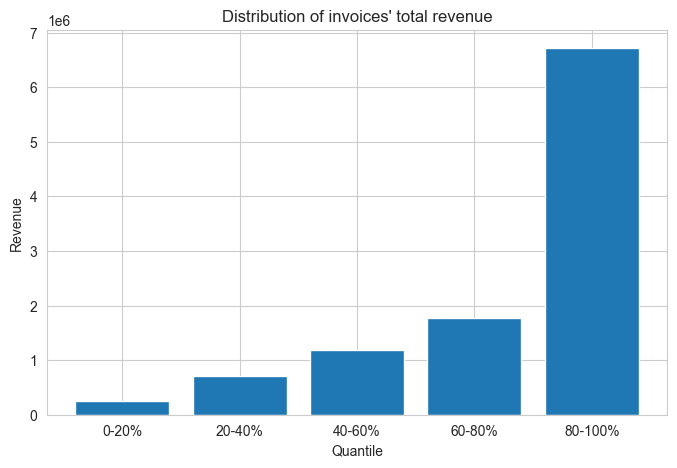

In [395]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
plt.bar(invoice_total_qbuckets["Quantile"], invoice_total_qbuckets["Total"])
plt.ylabel("Revenue")
plt.xlabel("Quantile")
plt.title("Distribution of invoices' total revenue")
plt.savefig("./plots/quantile-distribution.png")

# Most of the revenue comes from invoices with big totals on them

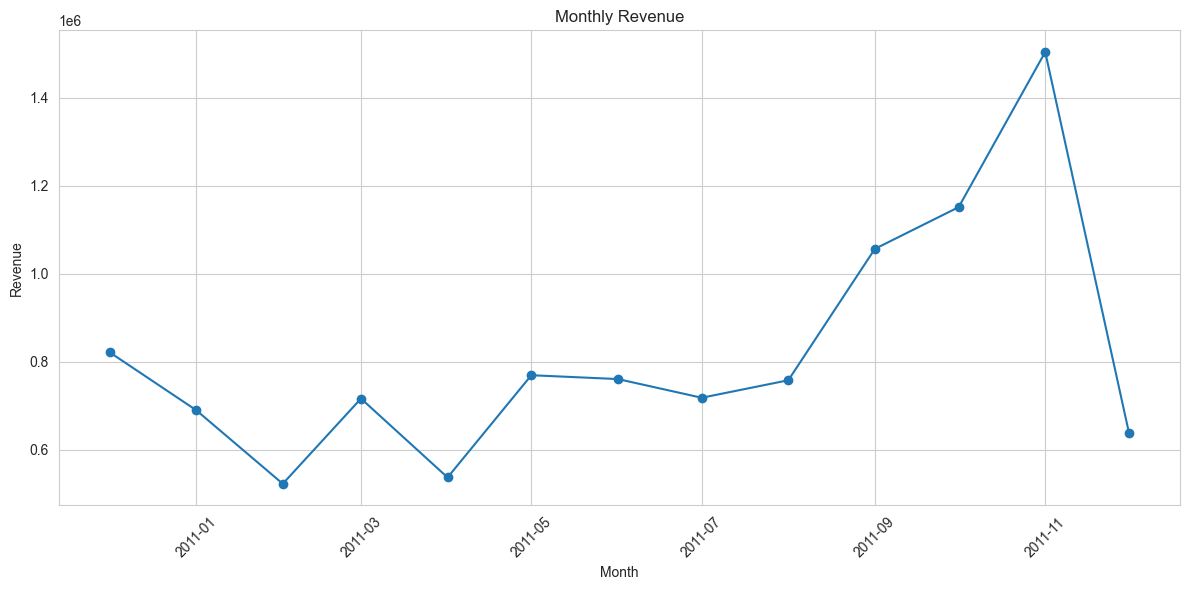

In [396]:
plt.figure(figsize=(12,6))
plt.plot(revenue_mom.index, revenue_mom["Total"], marker='o')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/monthly_revenue.png")
plt.show()


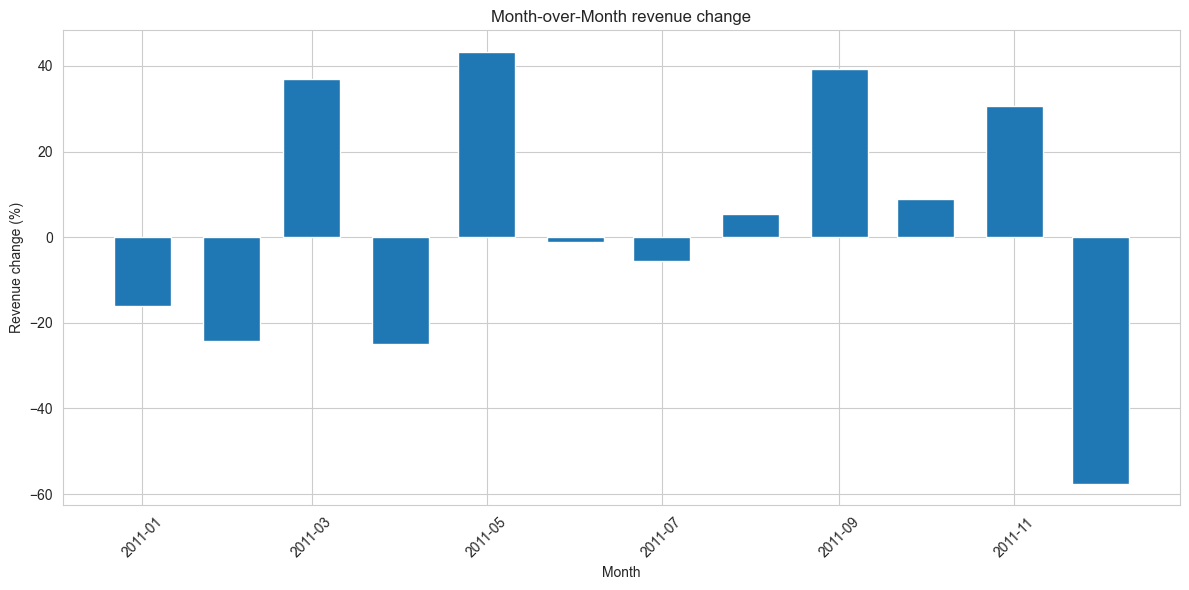

In [397]:
plt.figure(figsize=(12,6))
plt.bar(revenue_mom.index, revenue_mom["MoM"], width=20)
plt.title("Month-over-Month revenue change")
plt.xlabel("Month")
plt.ylabel("Revenue change (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/mom-revenue.png")
plt.show()


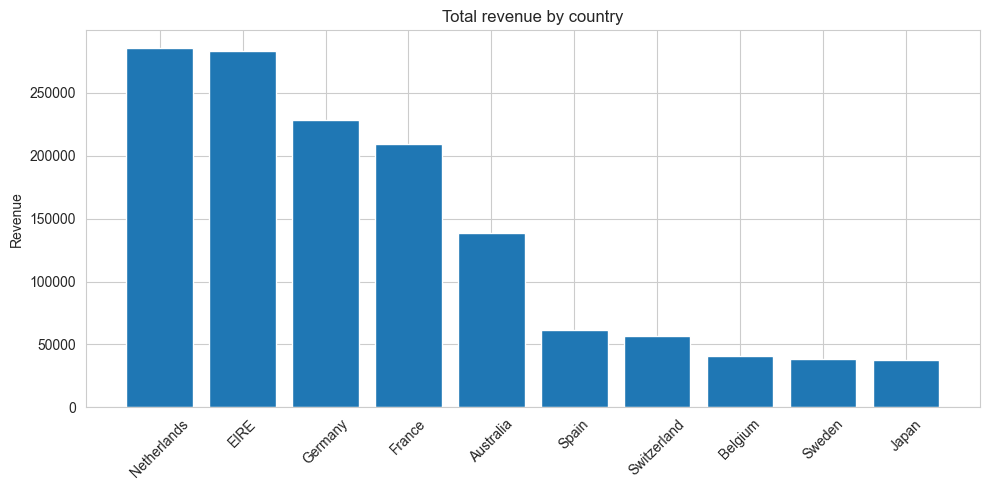

In [399]:
plt.figure(figsize=(10,5))
plt.bar(rev_by_country["Country"].head(10), rev_by_country["Total"].head(10))
plt.title("Total revenue by country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./plots/rev-by-country.png")
plt.show()

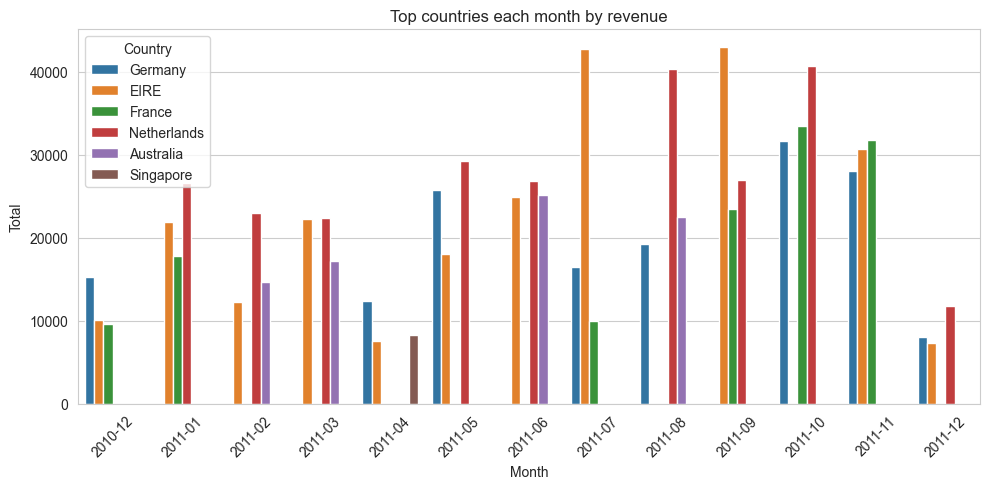

In [400]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Month",
    y="Total",
    hue="Country",
    data=top_countries_by_month
)
plt.xticks(rotation=45)
plt.title("Top countries each month by revenue")
plt.tight_layout()
plt.savefig("./plots/month-country-top.png")